# Salary Analysis for Data Scientists in Data Science

Analyzing salaries is a crucial aspect of understanding the compensation landscape for data scientists in the field of data science. By examining salary data, we can gain insights into the factors that influence earning potential, such as experience, education, location, and industry. Salary analysis helps organizations attract and retain top talent by offering competitive compensation packages. It also enables data scientists to benchmark their own salaries and negotiate better terms. By leveraging statistical techniques and data visualization, we can uncover trends, patterns, and outliers in salary data, providing valuable information for decision-making and strategic planning. Salary analysis plays a vital role in ensuring fair compensation practices and promoting transparency within the data science community.


## Importing Libraires

In [1]:
import pandas as pd     # pandas is a data manipulation library that helps reading and manipulating data from various sources.
import matplotlib.pyplot as plt # matplotlib provides powerful functions for plotting figures

## Reading the csv file into a pandas dataframe &  Display the first 5 rows of the dataframe

In [2]:
df = pd.read_csv('SalariesData.csv')     
df.head()                                    

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Data Prepration

## Dropping the Salary and Salary Currency Columns

In [3]:
df = df.drop(['salary', 'salary_currency'], axis=1)     # Drop the salary and salary_currency columns
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


# Removing Naan and missing Values

In [4]:
df = df.dropna()    # Drop rows with missing values (NaN) in any column 
df.isnull().sum()   # Check if there are any missing values in the DataFrame

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Checking Duplicate values in the DataFrame

In [5]:
duplicates = df.duplicated()    # Find duplicate rows in the DataFrame
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool


## Unique Values from each column in the Data 

In [6]:
# Find and list all the unique values in each column of the dataframe
for column in df.columns:
    print(column, ":", df[column].unique())

work_year : [2023 2022 2020 2021]
experience_level : ['SE' 'MI' 'EN' 'EX']
employment_type : ['FT' 'CT' 'FL' 'PT']
job_title : ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'


## Replace the values in the 'experience_level' column with corresponding labels:
### 'SE' -> 'Senior Level/Expert'
### 'MI' -> 'Medium Level/Intermediate'
### 'EN' -> 'Entry Level'
### 'EX' -> 'Executive Level'

In [7]:

df['experience_level'] = df['experience_level'].replace({'SE': 'Senior Level/Expert', 'MI': 'Medium Level/Intermediate', 'EN': 'Entry Level', 'EX': 'Executive Level'})   
# Replace the abbreviations with full forms in the experience_level column
df.head()   # Display the first few rows of the DataFrame

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level/Expert,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Medium Level/Intermediate,CT,ML Engineer,30000,US,100,US,S
2,2023,Medium Level/Intermediate,CT,ML Engineer,25500,US,100,US,S
3,2023,Senior Level/Expert,FT,Data Scientist,175000,CA,100,CA,M
4,2023,Senior Level/Expert,FT,Data Scientist,120000,CA,100,CA,M


# Salary in USD Column Statistics

In [8]:
sum_result = df['salary_in_usd'].sum()    # Calculate the sum of the salary_in_usd column
mean_result =  df['salary_in_usd'].mean()    # Calculate the mean of the salary_in_usd column
median_result = df['salary_in_usd'].median()    # Calculate the median of the salary_in_usd column
std_result =  df['salary_in_usd'].std()    # Calculate the standard deviation of the salary_in_usd column
var_result = df['salary_in_usd'].var()    # Calculate the variance of the salary_in_usd column
kurtosis_result = df['salary_in_usd'].kurtosis()    # Calculate the kurtosis of the salary_in_usd column
skew_result =   df['salary_in_usd'].skew()    # Calculate the skewness of the salary_in_usd column

result_string = f"Sum: {sum_result}\nMean: {mean_result}\nMedian: {median_result}\nStandard Deviation: {std_result}\nVariance: {var_result}\nKurtosis: {kurtosis_result}\nSkewness: {skew_result}"
print(result_string)

Sum: 516576814
Mean: 137570.38988015978
Median: 135000.0
Standard Deviation: 63055.6252782241
Variance: 3976011879.227814
Kurtosis: 0.8340064594833612
Skewness: 0.5364011659712974


# Correlation of all numeric variables. 	

In [9]:
numeric_columns = df.select_dtypes(include='number')    # Select only the numeric columns from the dataframe 
correlation_matrix = numeric_columns.corr()            # Calculate the correlation matrix of the numeric columns
correlation_matrix              

,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000


# Top 15 Jobs 

In [10]:
top_15_jobs = df['job_title'].value_counts().head(15)   # Count the number of occurrences of each job title in the dataframe and display the top 15
top_15_jobs

job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: count, dtype: int64

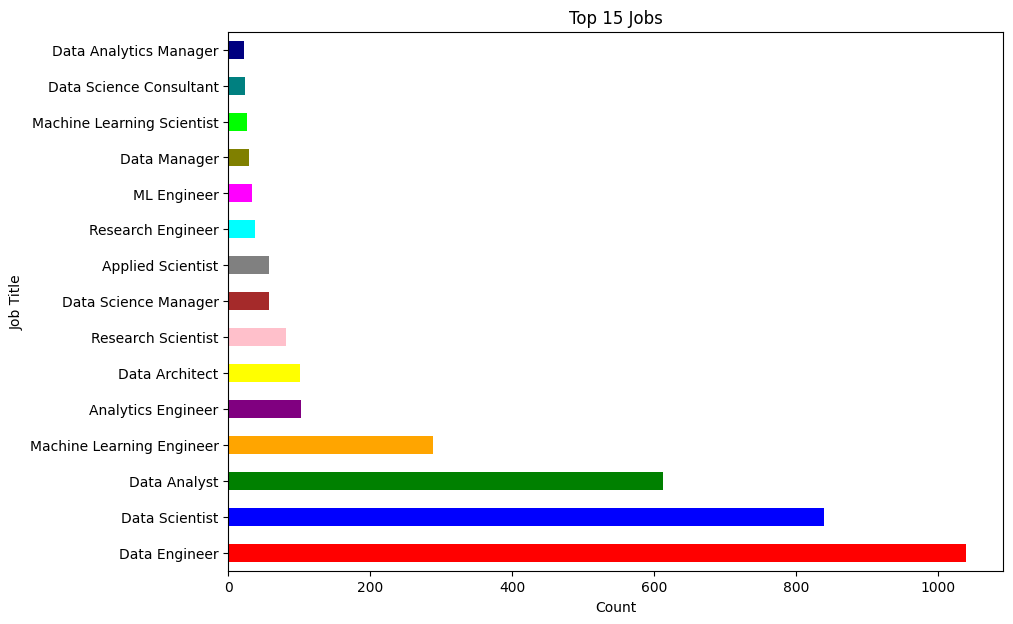

In [18]:
top_15_jobs.plot(kind='barh', figsize=(10, 7),  
                  color=['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'olive', 'lime', 'teal', 'navy'])    
# Plot the top 15 jobs in a horizontal bar chart
plt.xlabel('Count')         
plt.ylabel('Job Title')     
plt.title('Top 15 Jobs')
plt.show()

# Highest Paying Jobs Bar Graph

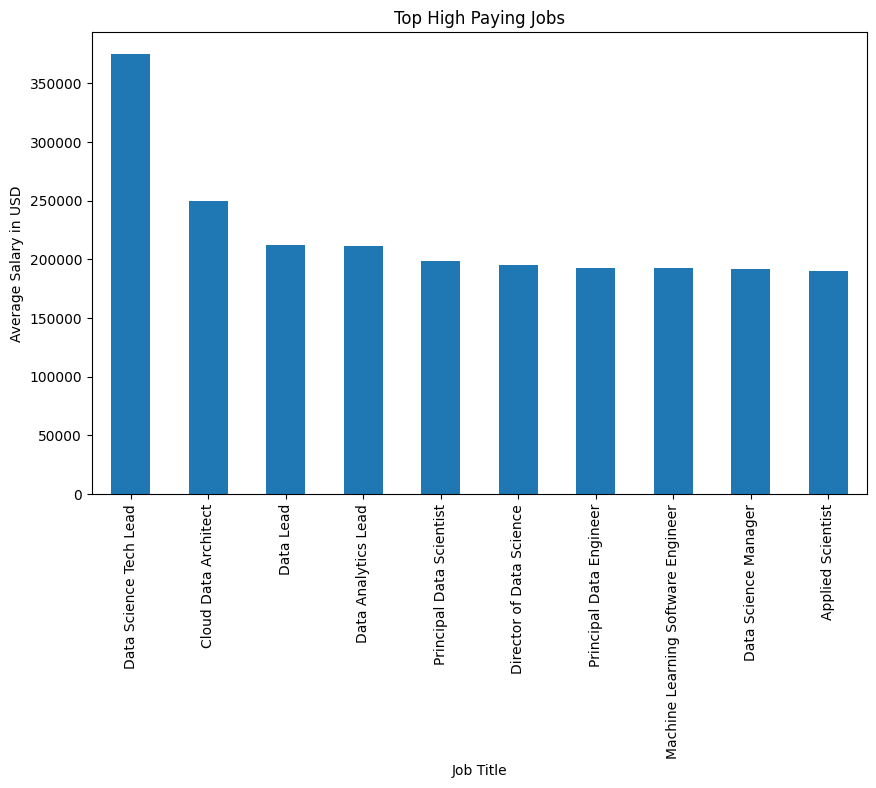

In [12]:
high_paying_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)        # Calculate the average salary for each job title and display the top 10 high paying jobs 
high_paying_jobs.plot(kind='bar', figsize=(10, 6))  # Plot the top 10 high paying jobs in a bar chart
plt.xlabel('Job Title')     
plt.ylabel('Average Salary in USD')
plt.title('Top High Paying Jobs')
plt.show()

# Salaries Based on Experience level

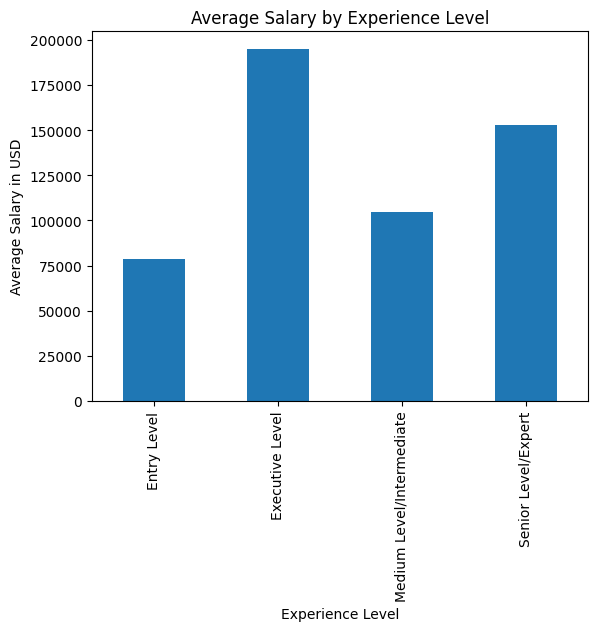

In [13]:
df.groupby('experience_level')['salary_in_usd'].mean().plot(kind='bar')     # Plot the average salary for each experience level
plt.xlabel('Experience Level')      
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Experience Level')
plt.show()

# Salary In USD Histogram

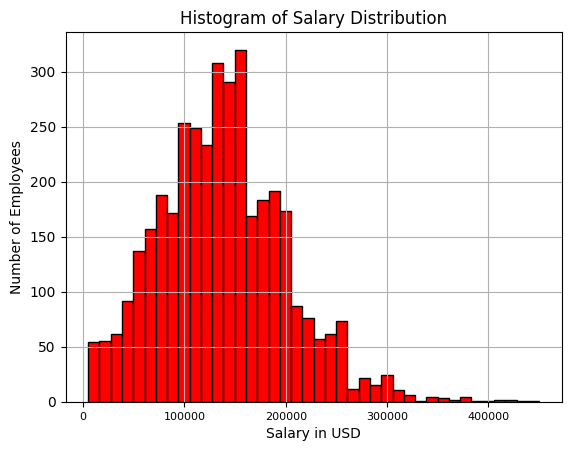

In [14]:
plt.hist(df['salary_in_usd'], bins=40, color='red', edgecolor='black')  # Create a histogram with 40 bins for the salary column 
plt.xlabel('Salary in USD')     
plt.ylabel('Number of Employees')
plt.title('Histogram of Salary Distribution')
plt.tick_params(axis='x', which='both', labelsize=8)  
plt.grid(True)  # Add gridlines to the plot
plt.show()

# Salary In USD Box Plot

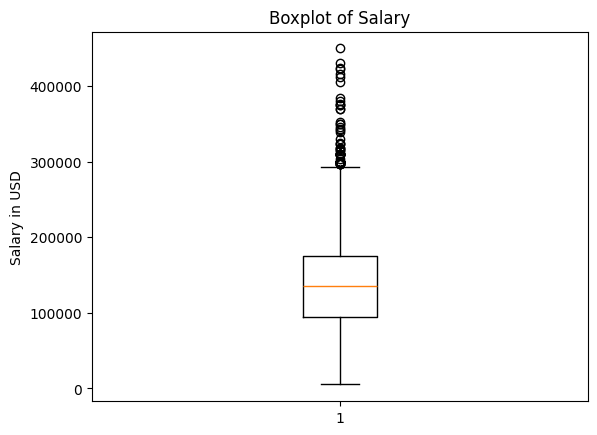

In [15]:
plt.boxplot(df['salary_in_usd'])    # Create a boxplot for the salary column
plt.ylabel('Salary in USD')         
plt.title('Boxplot of Salary')
plt.show()

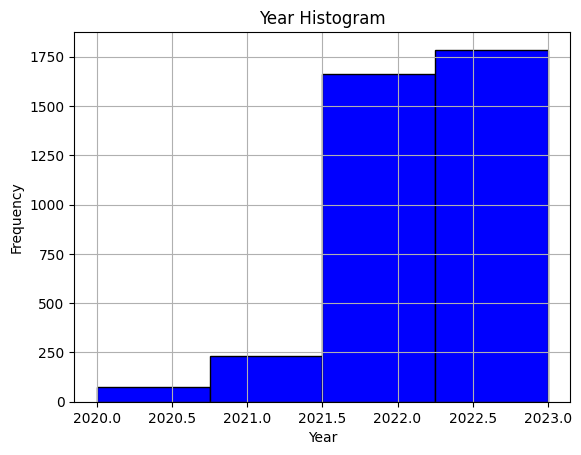

In [16]:
plt.hist(df['work_year'],bins = 4, color='blue', edgecolor='black')  # Create a histogram for the work_year column
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year Histogram')
plt.grid(True)
plt.show()

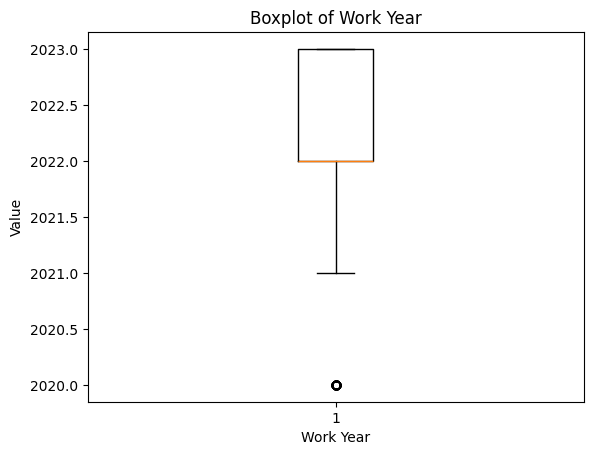

In [17]:
plt.boxplot(df['work_year'])
plt.xlabel('Work Year')
plt.ylabel('Value')
plt.title('Boxplot of Work Year')
plt.show()